In [0]:
from google.colab import drive

# Steps to signup for the API

- Go to the url and follow the steps Under Bing Search APIs v7 section. Most of it is self explanatory

- https://azure.microsoft.com/en-in/try/cognitive-services/?api=search-api-v7

- After signing up, you will get couple of keys which are valid for 7 days, copy and use them here.

### API Keys adding them to *envs*

In [0]:
# Make a note of your API-Keys from AZURE

In [40]:
BING_SEARCH_V7_SUBSCRIPTION_KEY = input("Subscription key : ") # input the above API key here.

Subscription key : d93a828fd49648ddb0ba8f4257d795a8


In [0]:
import os

# Add your Bing Search V7 subscription key and endpoint to your environment variables.
os.environ['BING_SEARCH_V7_SUBSCRIPTION_KEY'] = BING_SEARCH_V7_SUBSCRIPTION_KEY

# Using the Bing search API with key

## Query - 1

In [0]:
import json
import os 
from pprint import pprint
import requests


In [88]:
query = "Atos syntel"
query

'Atos syntel'

In [0]:
headers = {
      # Request headers
      'Ocp-Apim-Subscription-Key': os.environ['BING_SEARCH_V7_SUBSCRIPTION_KEY'],
}

In [0]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import json

def search(query, offset=0, count=10):

  params = urllib.parse.urlencode({
      # Request parameters
      'q': query,
      'count': count,
      'offset': offset,
      'mkt': 'en-us',
      'safesearch': 'Moderate',
  })

  try:
      conn = http.client.HTTPSConnection('api.cognitive.microsoft.com')
      conn.request("GET", "/bing/v7.0/search?%s" % params, "{body}", headers)
      response = conn.getresponse()
      data = response.read()
      conn.close()
  except Exception as e:
      print("[Errno {0}] {1}".format(e.errno, e.strerror))

  return json.loads(data)

In [91]:
res = search(query, offset=0, count=5)
res.keys()
for k,v in res.items():
  print("{:15s} : {}".format(k, v))

_type           : SearchResponse
queryContext    : {'originalQuery': 'Atos syntel'}
webPages        : {'webSearchUrl': 'https://www.bing.com/search?q=Atos+syntel', 'totalEstimatedMatches': 142000, 'value': [{'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.0', 'name': 'my Atos Syntel', 'url': 'https://www.myatos-syntel.net/', 'about': [{'name': 'Syntel'}], 'isFamilyFriendly': True, 'displayUrl': 'https://www.myatos-syntel.net', 'snippet': 'Note: Since your browser does not support JavaScript, you must press the Continue button once to proceed.', 'deepLinks': [{'name': 'Login', 'url': 'https://www.myatos-syntel.net/test'}, {'name': 'Selfhelp', 'url': 'https://selfhelp.myatos-syntel.net/'}, {'name': 'FAQ', 'url': 'https://selfhelp.myatos-syntel.net/FAQ.htm'}], 'dateLastCrawled': '2020-03-01T14:58:00.0000000Z', 'language': 'en', 'isNavigational': False}, {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.1', 'name': 'Atos Syntel', 'url': 'https://www.atos-syntel.net/'

 

---


### web Pages

In [92]:
for k,v in res['webPages'].items():
  print("{:23s}: {}".format(k, v))

webSearchUrl           : https://www.bing.com/search?q=Atos+syntel
totalEstimatedMatches  : 142000
value                  : [{'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.0', 'name': 'my Atos Syntel', 'url': 'https://www.myatos-syntel.net/', 'about': [{'name': 'Syntel'}], 'isFamilyFriendly': True, 'displayUrl': 'https://www.myatos-syntel.net', 'snippet': 'Note: Since your browser does not support JavaScript, you must press the Continue button once to proceed.', 'deepLinks': [{'name': 'Login', 'url': 'https://www.myatos-syntel.net/test'}, {'name': 'Selfhelp', 'url': 'https://selfhelp.myatos-syntel.net/'}, {'name': 'FAQ', 'url': 'https://selfhelp.myatos-syntel.net/FAQ.htm'}], 'dateLastCrawled': '2020-03-01T14:58:00.0000000Z', 'language': 'en', 'isNavigational': False}, {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.1', 'name': 'Atos Syntel', 'url': 'https://www.atos-syntel.net/', 'about': [{'name': 'Syntel'}], 'isFamilyFriendly': True, 'displayUrl': 'https://

In [93]:
for page in res['webPages']['value']:
  print(page.keys())

dict_keys(['id', 'name', 'url', 'about', 'isFamilyFriendly', 'displayUrl', 'snippet', 'deepLinks', 'dateLastCrawled', 'language', 'isNavigational'])
dict_keys(['id', 'name', 'url', 'about', 'isFamilyFriendly', 'displayUrl', 'snippet', 'deepLinks', 'dateLastCrawled', 'language', 'isNavigational'])
dict_keys(['id', 'contractualRules', 'name', 'url', 'about', 'isFamilyFriendly', 'displayUrl', 'snippet', 'dateLastCrawled', 'language', 'isNavigational'])
dict_keys(['id', 'name', 'url', 'about', 'isFamilyFriendly', 'displayUrl', 'snippet', 'dateLastCrawled', 'language', 'isNavigational'])
dict_keys(['id', 'name', 'url', 'isFamilyFriendly', 'displayUrl', 'snippet', 'dateLastCrawled', 'language', 'isNavigational'])


In [94]:
for page in res['webPages']['value']:
  for k,v in page.items():
    print("{:17s}: {}".format(k, v))
  print('='*30)

id               : https://api.cognitive.microsoft.com/api/v7/#WebPages.0
name             : my Atos Syntel
url              : https://www.myatos-syntel.net/
about            : [{'name': 'Syntel'}]
isFamilyFriendly : True
displayUrl       : https://www.myatos-syntel.net
snippet          : Note: Since your browser does not support JavaScript, you must press the Continue button once to proceed.
deepLinks        : [{'name': 'Login', 'url': 'https://www.myatos-syntel.net/test'}, {'name': 'Selfhelp', 'url': 'https://selfhelp.myatos-syntel.net/'}, {'name': 'FAQ', 'url': 'https://selfhelp.myatos-syntel.net/FAQ.htm'}]
dateLastCrawled  : 2020-03-01T14:58:00.0000000Z
language         : en
isNavigational   : False
id               : https://api.cognitive.microsoft.com/api/v7/#WebPages.1
name             : Atos Syntel
url              : https://www.atos-syntel.net/
about            : [{'name': 'Syntel'}]
isFamilyFriendly : True
displayUrl       : https://www.atos-syntel.net
snippet          : Atos

---

### Related Searches 


- These will appear on the bottom of each webpage

In [95]:
res['relatedSearches']['value'][0]

{'displayText': 'atos syntel salary',
 'text': 'atos syntel salary',
 'webSearchUrl': 'https://www.bing.com/search?q=atos+syntel+salary'}

In [96]:
# get the webpage results from the search results
for rs in res['relatedSearches']['value']:
  print(f"\n{rs['text']}:-- {rs['displayText']}\n\t{rs['webSearchUrl']}")


atos syntel salary:-- atos syntel salary
	https://www.bing.com/search?q=atos+syntel+salary

atos syntel webmail:-- atos syntel webmail
	https://www.bing.com/search?q=atos+syntel+webmail

atos syntel layoff:-- atos syntel layoff
	https://www.bing.com/search?q=atos+syntel+layoff

atos syntel glassdoor:-- atos syntel glassdoor
	https://www.bing.com/search?q=atos+syntel+glassdoor

syntel atos philippines:-- syntel atos philippines
	https://www.bing.com/search?q=syntel+atos+philippines

atos syntel address:-- atos syntel address
	https://www.bing.com/search?q=atos+syntel+address

atos syntel jobs:-- atos syntel jobs
	https://www.bing.com/search?q=atos+syntel+jobs

atos syntel inc:-- atos syntel inc
	https://www.bing.com/search?q=atos+syntel+inc


### videos


In [97]:
res['videos'].keys()

dict_keys(['id', 'readLink', 'webSearchUrl', 'isFamilyFriendly', 'value', 'scenario'])

In [98]:
for k, v in res['videos'].items():
  print("{:17s}:  {}".format(k, v))

id               :  https://api.cognitive.microsoft.com/api/v7/#Videos
readLink         :  https://api.cognitive.microsoft.com/api/v7/videos/search?q=atos+syntel
webSearchUrl     :  https://www.bing.com/videos/search?q=atos+syntel
isFamilyFriendly :  True
value            :  [{'webSearchUrl': 'https://www.bing.com/videos/search?q=atos%20syntel&view=detail&mid=243BB0BD4EF3B17D3D7B243BB0BD4EF3B17D3D7B', 'name': 'Modernize your IT systems with MIII (Manage Migrate Modernize) from Atos | Syntel', 'description': 'Overcome the challenges of mainframe by modernizing your core IT systems to meet the demands of the digital age. Learn how we can help: https://www.atos-syntel.net/technolog...', 'thumbnailUrl': 'https://tse3.mm.bing.net/th?id=OVP.CrEQA5HU7pY7DafMFVazkQEsDh&pid=Api', 'datePublished': '2020-01-30T08:00:00.0000000', 'publisher': [{'name': 'YouTube'}], 'isAccessibleForFree': True, 'contentUrl': 'https://www.youtube.com/watch?v=hy1lZK-_beM', 'hostPageUrl': 'https://www.youtube.com/watc

In [99]:
for video in res['videos']['value']:
  for k,v in video.items():
    print('{:20s}: {}'.format(k, v))
  print('-'*100,'\n')

webSearchUrl        : https://www.bing.com/videos/search?q=atos%20syntel&view=detail&mid=243BB0BD4EF3B17D3D7B243BB0BD4EF3B17D3D7B
name                : Modernize your IT systems with MIII (Manage Migrate Modernize) from Atos | Syntel
description         : Overcome the challenges of mainframe by modernizing your core IT systems to meet the demands of the digital age. Learn how we can help: https://www.atos-syntel.net/technolog...
thumbnailUrl        : https://tse3.mm.bing.net/th?id=OVP.CrEQA5HU7pY7DafMFVazkQEsDh&pid=Api
datePublished       : 2020-01-30T08:00:00.0000000
publisher           : [{'name': 'YouTube'}]
isAccessibleForFree : True
contentUrl          : https://www.youtube.com/watch?v=hy1lZK-_beM
hostPageUrl         : https://www.youtube.com/watch?v=hy1lZK-_beM
encodingFormat      : mp4
hostPageDisplayUrl  : https://www.youtube.com/watch?v=hy1lZK-_beM
width               : 1280
height              : 720
duration            : PT22S
motionThumbnailUrl  : https://tse3.mm.bing.net/th

### rankingResponse

- It will contains the urls to get the next page results

In [100]:
res['rankingResponse'].keys()

dict_keys(['mainline', 'sidebar'])

In [101]:
res['rankingResponse']['mainline'].keys()

dict_keys(['items'])

In [102]:
for item in res['rankingResponse']['mainline']['items']:
  for k, v in item.items():
    print('{:15s}: {}'.format(k, v))
  print('-'*50, '\n')

answerType     : WebPages
resultIndex    : 0
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.0'}
-------------------------------------------------- 

answerType     : WebPages
resultIndex    : 1
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.1'}
-------------------------------------------------- 

answerType     : WebPages
resultIndex    : 2
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.2'}
-------------------------------------------------- 

answerType     : Videos
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#Videos'}
-------------------------------------------------- 

answerType     : WebPages
resultIndex    : 3
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.3'}
-------------------------------------------------- 

answerType     : WebPages
resultIndex    : 4
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.4'

### Bing search API Playground 

- You can try this live at https://azure.microsoft.com/en-in/services/cognitive-services/bing-web-search-api/

## Query - 2

- If you search for some persons, you will get some images and entities

In [110]:
res = search("Narendra modi")
res.keys()
for k,v in res.items():
  print("{:15s} : {}".format(k, v))

_type           : SearchResponse
queryContext    : {'originalQuery': 'Narendra modi'}
webPages        : {'webSearchUrl': 'https://www.bing.com/search?q=Narendra+modi', 'totalEstimatedMatches': 636000, 'value': [{'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.0', 'contractualRules': [{'_type': 'ContractualRules/LicenseAttribution', 'targetPropertyName': 'description', 'targetPropertyIndex': 0, 'mustBeCloseToContent': True, 'license': {'name': 'CC-BY-SA', 'url': 'http://creativecommons.org/licenses/by-sa/3.0/'}, 'licenseNotice': 'Text under CC-BY-SA license'}], 'name': 'Narendra Modi - Wikipedia', 'url': 'https://en.wikipedia.org/wiki/Narendra_Modi', 'about': [{'name': 'Narendra Modi'}, {'name': 'Narendra Modi'}], 'isFamilyFriendly': True, 'displayUrl': 'https://en.wikipedia.org/wiki/Narendra_Modi', 'snippet': 'Narendra Damodardas Modi (Gujarati pronunciation: [ˈnəɾendrə dɑmodəɾˈdɑs ˈmodiː] (); born 17 September 1950) is an Indian politician serving as the 14th and current P

### queryContext

In [111]:
for k, v in res['queryContext'].items():
  print('{:25s}: {}'.format(k, v))

originalQuery            : Narendra modi


### webPages

In [112]:
res['webPages'].keys()

dict_keys(['webSearchUrl', 'totalEstimatedMatches', 'value'])

In [113]:
res['webPages']['webSearchUrl'],res['webPages']['totalEstimatedMatches']

('https://www.bing.com/search?q=Narendra+modi', 636000)

In [114]:
for val in res['webPages']['value']:
  for k, v in val.items():
    print('{:10s}: {}'.format(k, v))
  print('-'*20, '\n')

id        : https://api.cognitive.microsoft.com/api/v7/#WebPages.0
contractualRules: [{'_type': 'ContractualRules/LicenseAttribution', 'targetPropertyName': 'description', 'targetPropertyIndex': 0, 'mustBeCloseToContent': True, 'license': {'name': 'CC-BY-SA', 'url': 'http://creativecommons.org/licenses/by-sa/3.0/'}, 'licenseNotice': 'Text under CC-BY-SA license'}]
name      : Narendra Modi - Wikipedia
url       : https://en.wikipedia.org/wiki/Narendra_Modi
about     : [{'name': 'Narendra Modi'}, {'name': 'Narendra Modi'}]
isFamilyFriendly: True
displayUrl: https://en.wikipedia.org/wiki/Narendra_Modi
snippet   : Narendra Damodardas Modi (Gujarati pronunciation: [ˈnəɾendrə dɑmodəɾˈdɑs ˈmodiː] (); born 17 September 1950) is an Indian politician serving as the 14th and current Prime Minister of India since 2014. He was the Chief Minister of Gujarat from 2001 to 2014 and is the Member of Parliament for Varanasi.Modi is a member of the Bharatiya Janata Party (BJP) and of the Rashtriya ...
da

### images

In [115]:
for k, v in res['images'].items():
  if k!='value':
    print('{:20s}: {}'.format(k, v))

id                  : https://api.cognitive.microsoft.com/api/v7/#Images
readLink            : https://api.cognitive.microsoft.com/api/v7/images/search?q=narendra+modi&qpvt=narendra+modi
webSearchUrl        : https://www.bing.com/images/search?q=narendra+modi&qpvt=narendra+modi
isFamilyFriendly    : True


In [116]:
for val in res['images']['value']:
  for k, v in val.items():
    print('{:20s}: {}'.format(k, v))
  print('-'*20, '\n')

webSearchUrl        : https://www.bing.com/images/search?q=narendra+modi&id=A462A9A42CBC6132A55613CDB874FD915436410F&FORM=IARRTH
name                : Narendra Modi's budget sops are darts in the dark, not ...
thumbnailUrl        : https://tse1.mm.bing.net/th?id=OIP.6yJu14MSH8KkugXP9zsB0QHaEK&pid=Api
contentUrl          : https://cdn-live.theprint.in/wp-content/uploads/2019/02/Narendra-Modi-11.jpg
hostPageUrl         : https://theprint.in/opinion/narendra-modis-budget-sops-are-darts-in-the-dark-not...
contentSize         : 139689 B
encodingFormat      : jpeg
hostPageDisplayUrl  : https://theprint.in/opinion/narendra-modis-budget-sops-are-darts-in-the-dark-not...
width               : 1200
height              : 675
thumbnail           : {'width': 474, 'height': 266}
-------------------- 

webSearchUrl        : https://www.bing.com/images/search?q=narendra+modi&id=CFA998BA079A049CB6BCBEEF35A169B7400949A4&FORM=IARRTH
name                : This former BJP leader has got more Facebook views

# Bing Image Search API

In [0]:
######################################3
# helper functions to display the images
######################################3

from PIL import Image
import requests
import matplotlib.pyplot as plt

def show_img(url,  title=''):
  response = requests.get(url, stream=True)
  img = Image.open(response.raw)

  plt.imshow(img)
  plt.axis('off')
  plt.title(title)
  plt.show()


def search_images(query, offset=0, count=5):

  params = urllib.parse.urlencode({
      # Request parameters
      'q': query,
      'count': count,   # # of results per request
      'offset': offset,   # change this offset to get the next 10 results
      'mkt': 'en-us',
      'safesearch': 'Moderate',
  })

  try:
      conn = http.client.HTTPSConnection('api.cognitive.microsoft.com')
      conn.request("GET", "/bing/v7.0/images/search?%s" % params, "{body}", headers) # changes in this line
      response = conn.getresponse()
      data = response.read()
      conn.close()
  except Exception as e:
      print("[Errno {0}] {1}".format(e.errno, e.strerror))

  return json.loads(data)

## Image Search

In [118]:
res = search_images("pranab mukarjee", offset=0, count=4) 
for k,v in res.items():
  print("{:21s} : {}".format(k, v))

_type                 : Images
instrumentation       : {'_type': 'ResponseInstrumentation'}
readLink              : images/search?q=pranab mukarjee
webSearchUrl          : https://www.bing.com/images/search?q=pranab mukarjee&FORM=OIIARP
queryContext          : {'originalQuery': 'pranab mukarjee', 'alterationDisplayQuery': 'pranab mukherjee', 'alterationOverrideQuery': '+pranab mukarjee', 'alterationMethod': 'AM_ChangeItWithRecourse', 'alterationType': 'CombinedAlterationsChained'}
totalEstimatedMatches : 174
nextOffset            : 7
currentOffset         : 0
value                 : [{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=pranab+mukarjee&id=FBC0CC78249C49C31824DC5ED2363A2F357E3698&simid=608046216197178314', 'name': 'Pranab Mukherjee - Wikipedia', 'thumbnailUrl': 'https://tse3.mm.bing.net/th?id=OIP.MJrU45ihOP3SmO8Vk6CG-AHaKX&pid=Api', 'datePublished': '2019-12-26T08:56:00.0000000Z', 'isFamilyFriendly': True, 'creativeCommons': 'AttributionShareA

### queryExpansions

In [119]:
for qe in res['queryExpansions'][:10]:
    for k,v in qe.items():
      print('{:10s}: {}'.format(k,v))
    print('-'*50, '\n')

text      : Pranab Mukherjee India
displayText: India
webSearchUrl: https://www.bing.com/images/search?q=Pranab+Mukherjee+India&tq=%7b%22pq%22%3a%22pranab+mukarjee%22%2c%22qs%22%3a%5b%7b%22cv%22%3a%22%22%2c%22pv%22%3a%22%22%2c%22hps%22%3atrue%2c%22iqp%22%3afalse%7d%2c%7b%22cv%22%3a%22India%22%2c%22pv%22%3a%22%22%2c%22hps%22%3afalse%2c%22iqp%22%3atrue%7d%5d%7d&FORM=IRPATC
searchLink: https://api.cognitive.microsoft.com/api/v7/images/search?q=Pranab+Mukherjee+India&tq=%7b%22pq%22%3a%22pranab+mukarjee%22%2c%22qs%22%3a%5b%7b%22cv%22%3a%22%22%2c%22pv%22%3a%22%22%2c%22hps%22%3atrue%2c%22iqp%22%3afalse%7d%2c%7b%22cv%22%3a%22India%22%2c%22pv%22%3a%22%22%2c%22hps%22%3afalse%2c%22iqp%22%3atrue%7d%5d%7d
thumbnail : {'thumbnailUrl': 'https://tse2.mm.bing.net/th?q=Pranab+Mukherjee+India&pid=Api&mkt=en-US&adlt=moderate&t=1'}
-------------------------------------------------- 

text      : Modi Pranab Mukherjee
displayText: Modi
webSearchUrl: https://www.bing.com/images/search?q=Modi+Pranab+Mukherjee

### pivotSuggestions

In [120]:
res['pivotSuggestions'][0]['pivot']

''

In [121]:
for s in res['pivotSuggestions'][0]['suggestions']:
  for k,v in s.items():
    print('{:10s}: {}'.format(k,v))
  print('-'*50, '\n')

text      : Narendra Modi
displayText: Narendra Modi
webSearchUrl: https://www.bing.com/images/search?q=Narendra+Modi&tq=%7b%22pq%22%3a%22pranab+mukarjee%22%2c%22qs%22%3a%5b%7b%22cv%22%3a%22%22%2c%22pv%22%3a%22%22%2c%22hps%22%3atrue%2c%22iqp%22%3afalse%7d%2c%7b%22cv%22%3a%22Narendra+Modi%22%2c%22pv%22%3a%22%22%2c%22hps%22%3afalse%2c%22iqp%22%3atrue%7d%5d%7d&FORM=IRQBPS
searchLink: https://api.cognitive.microsoft.com/api/v7/images/search?q=Narendra+Modi&tq=%7b%22pq%22%3a%22pranab+mukarjee%22%2c%22qs%22%3a%5b%7b%22cv%22%3a%22%22%2c%22pv%22%3a%22%22%2c%22hps%22%3atrue%2c%22iqp%22%3afalse%7d%2c%7b%22cv%22%3a%22Narendra+Modi%22%2c%22pv%22%3a%22%22%2c%22hps%22%3afalse%2c%22iqp%22%3atrue%7d%5d%7d
thumbnail : {'thumbnailUrl': 'https://tse1.mm.bing.net/th?q=Narendra+Modi&pid=Api&mkt=en-US&adlt=moderate&t=1'}
-------------------------------------------------- 

text      : Pratibha Patil
displayText: Pratibha Patil
webSearchUrl: https://www.bing.com/images/search?q=Pratibha+Patil&tq=%7b%22pq%22%

### relatedSearches   ( which you will see at the top of the page) 

In [122]:
for rs in res['relatedSearches']:
  for k,v in rs.items():
    print('{:10s}: {}'.format(k,v))
  print('-'*50, '\n')

text      : Sharmistha Mukherjee
displayText: Sharmistha Mukherjee
webSearchUrl: https://www.bing.com/images/search?q=Sharmistha+Mukherjee&FORM=IRPATC
searchLink: https://api.cognitive.microsoft.com/api/v7/images/search?q=Sharmistha+Mukherjee
thumbnail : {'thumbnailUrl': 'https://tse3.mm.bing.net/th?q=Sharmistha+Mukherjee&pid=Api&mkt=en-US&adlt=moderate&t=1'}
-------------------------------------------------- 

text      : Suvra Mukherjee
displayText: Suvra Mukherjee
webSearchUrl: https://www.bing.com/images/search?q=Suvra+Mukherjee&FORM=IRPATC
searchLink: https://api.cognitive.microsoft.com/api/v7/images/search?q=Suvra+Mukherjee
thumbnail : {'thumbnailUrl': 'https://tse2.mm.bing.net/th?q=Suvra+Mukherjee&pid=Api&mkt=en-US&adlt=moderate&t=1'}
-------------------------------------------------- 

text      : Indian President
displayText: Indian President
webSearchUrl: https://www.bing.com/images/search?q=Indian+President&FORM=IRPATC
searchLink: https://api.cognitive.microsoft.com/api/v7/i

### Image search results

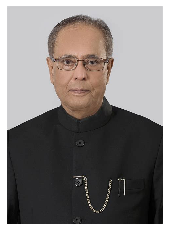

webSearchUrl: https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=pranab+mukarjee&id=FBC0CC78249C49C31824DC5ED2363A2F357E3698&simid=608046216197178314
name      : Pranab Mukherjee - Wikipedia
thumbnailUrl: https://tse3.mm.bing.net/th?id=OIP.MJrU45ihOP3SmO8Vk6CG-AHaKX&pid=Api
datePublished: 2019-12-26T08:56:00.0000000Z
isFamilyFriendly: True
creativeCommons: AttributionShareAlike
contentUrl: https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Pranab_Mukherjee_Portrait.jpg/1200px-Pranab_Mukherjee_Portrait.jpg
hostPageUrl: https://en.wikipedia.org/wiki/Pranab_Mukherjee
contentSize: 284398 B
encodingFormat: jpeg
hostPageDisplayUrl: https://en.wikipedia.org/wiki/Pranab_Mukherjee
width     : 1200
height    : 1680
hostPageFavIconUrl: https://www.bing.com/th?id=ODF.0QY68YH-YG5V7ZPdW4ZxaQ&pid=Api
hostPageDomainFriendlyName: Wikipedia
thumbnail : {'width': 474, 'height': 663}
imageInsightsToken: ccid_MJrU45ih*mid_FBC0CC78249C49C31824DC5ED2363A2F357E3698*simid_608046216197178314*

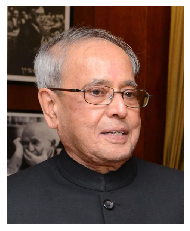

webSearchUrl: https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=pranab+mukarjee&id=FBC0CC78249C49C31824227EE41A463A94EB2C83&simid=608030969068194513
name      : Pranab Mukherjee - Wikipedia
thumbnailUrl: https://tse2.mm.bing.net/th?id=OIP.sX04Y7D-J__1Yu0ax7UI2gHaJJ&pid=Api
datePublished: 2018-02-08T21:23:00.0000000Z
isFamilyFriendly: True
creativeCommons: AttributionShareAlike
contentUrl: https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Pranab_Mukherjee_%28cropped%29.JPG/1200px-Pranab_Mukherjee_%28cropped%29.JPG
hostPageUrl: https://en.wikipedia.org/wiki/Pranab_Mukherjee
contentSize: 146536 B
encodingFormat: jpeg
hostPageDisplayUrl: https://en.wikipedia.org/wiki/Pranab_Mukherjee
width     : 1200
height    : 1483
hostPageFavIconUrl: https://www.bing.com/th?id=ODF.0QY68YH-YG5V7ZPdW4ZxaQ&pid=Api
hostPageDomainFriendlyName: Wikipedia
thumbnail : {'width': 474, 'height': 585}
imageInsightsToken: ccid_sX04Y7D+*mid_FBC0CC78249C49C31824227EE41A463A94EB2C83*simid_608030969

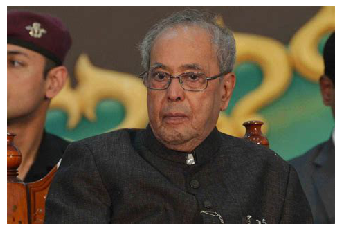

webSearchUrl: https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=pranab+mukarjee&id=BC82AC115F43A514A96678588C234DDFEA0F41A2&simid=608048419522808544
name      : Pranab Mukherjee reminds the media of its role, duties ...
thumbnailUrl: https://tse4.mm.bing.net/th?id=OIP.6T2aE5Iz5XTGwq4Lpt6fYQHaE7&pid=Api
datePublished: 2019-08-28T22:42:00.0000000Z
isFamilyFriendly: True
contentUrl: https://indiatribune.com/wp-content/uploads/2019/08/Pranab.jpg
hostPageUrl: https://indiatribune.com/pranab-mukherjee-reminds-the-media-of-its-role-duties/
contentSize: 205703 B
encodingFormat: jpeg
hostPageDisplayUrl: https://indiatribune.com/pranab-mukherjee-reminds-the-media-of-its-role-duties
width     : 2000
height    : 1331
thumbnail : {'width': 474, 'height': 315}
imageInsightsToken: ccid_6T2aE5Iz*mid_BC82AC115F43A514A96678588C234DDFEA0F41A2*simid_608048419522808544*thid_OIP.6T2aE5Iz5XTGwq4Lpt6fYQHaE7
insightsMetadata: {'recipeSourcesCount': 0, 'pagesIncludingCount': 6, 'availableSizesCount

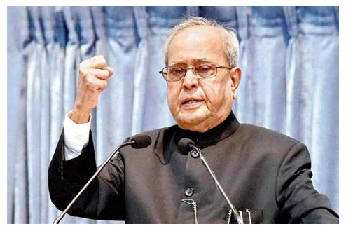

webSearchUrl: https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=pranab+mukarjee&id=D1AFEA8932FD8C0FEB3F8CCB49348FF6D74209B7&simid=607987761702898512
name      : Pranab Mukherjee: Quixotic heroism cannot lead the country ...
thumbnailUrl: https://tse3.mm.bing.net/th?id=OIP.l-wT5p8FQvubrJ_vK76FxwHaE3&pid=Api
datePublished: 2019-04-09T02:47:00.0000000Z
isFamilyFriendly: True
contentUrl: https://images.mid-day.com/images/2019/apr/Pranab-Mukherjee_d.jpg
hostPageUrl: https://www.mid-day.com/articles/pranab-mukherjee-quixotic-heroism-cannot-lead-the-country/20706197
contentSize: 41418 B
encodingFormat: jpeg
hostPageDisplayUrl: https://www.mid-day.com/articles/pranab-mukherjee-quixotic-heroism-cannot-lead-the...
width     : 670
height    : 440
hostPageFavIconUrl: https://www.bing.com/th?id=ODF.VOsh70aLUvkxCDQ3rd661Q&pid=Api
hostPageDomainFriendlyName: Mid Day
thumbnail : {'width': 474, 'height': 311}
imageInsightsToken: ccid_l+wT5p8F*mid_D1AFEA8932FD8C0FEB3F8CCB49348FF6D74209B7*si

In [123]:
for val in res['value']:
  show_img(val['thumbnailUrl'])
  for k,v in val.items():
    print('{:10s}: {}'.format(k,v))
  print('-'*50, '\n')

# Final notes

- We can use this image search api to collect images of a **specific person** OR **specific object** etc. The applications are limitless

- Example:
  - Collect all cellphone images to train a model to detect cell phone in an image
  - Collect all the weapon images like guns, knives to prevent people entering with weapons into some specific places like temples or schools
  - ...
  - ...
